In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [4]:
# Визначаємо рівень довіри
gamma = 0.99
alpha = 1 - gamma

# Розміри вибірок
sample_sizes = [100, 10_000, 1_000_000]

# Кількість реалізацій
num_realizations = 100

# Зберігаємо результати
results = []

for n in sample_sizes:
    for _ in range(num_realizations):
        # Генерація вибірки
        sample = np.random.normal(0, 1, n)
        
        # Обчислення середнього значення та дисперсії вибірки
        sample_mean = np.mean(sample)
        sample_var = np.var(sample, ddof=1)  # Незміщена оцінка дисперсії
        
        # Довірчий інтервал для математичного сподівання (нормальний розподіл, дисперсія невідома)
        t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
        margin_error_mean_a = t_critical * np.sqrt(sample_var / n)
        conf_interval_mean_a = (sample_mean - margin_error_mean_a, sample_mean + margin_error_mean_a)
        
        # Довірчий інтервал для математичного сподівання (невідомий розподіл)
        z_critical = stats.norm.ppf(1 - alpha/2)
        margin_error_mean_b = z_critical * np.sqrt(sample_var / n)
        conf_interval_mean_b = (sample_mean - margin_error_mean_b, sample_mean + margin_error_mean_b)
        
        # Довірчий інтервал для дисперсії (нормальний розподіл)
        chi2_lower = stats.chi2.ppf(alpha / 2, df=n-1)
        chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n-1)
        conf_interval_var = ((n - 1) * sample_var / chi2_upper, (n - 1) * sample_var / chi2_lower)
        
        # Додаємо результати
        results.append({
            "n": n,
            "Sample Mean": sample_mean,
            "Mean Confidence Interval (a)": conf_interval_mean_a,
            "Mean Interval Width (a)": conf_interval_mean_a[1] - conf_interval_mean_a[0],
            "Mean Confidence Interval (b)": conf_interval_mean_b,
            "Mean Interval Width (b)": conf_interval_mean_b[1] - conf_interval_mean_b[0],
            "Sample Variance": sample_var,
            "Variance Confidence Interval": conf_interval_var,
            "Variance Interval Width": conf_interval_var[1] - conf_interval_var[0],
            "Mean in Interval (a)": conf_interval_mean_a[0] <= 0 <= conf_interval_mean_a[1],
            "Mean in Interval (b)": conf_interval_mean_b[0] <= 0 <= conf_interval_mean_b[1],
            "Variance in Interval": conf_interval_var[0] <= 1 <= conf_interval_var[1]
        })

# Конвертуємо у DataFrame та відображаємо результати
df_results = pd.DataFrame(results)
df_results.head()

,n,Sample Mean,Mean Confidence Interval (a),Mean Interval Width (a),Mean Confidence Interval (b),Mean Interval Width (b),Sample Variance,Variance Confidence Interval,Variance Interval Width,Mean in Interval (a),Mean in Interval (b),Variance in Interval
0,100,0.308593,"(0.06246149648915403, 0.5547248100989471)",0.492263,"(0.06720120347618783, 0.5499851031119133)",0.482784,0.878236,"(0.6255659426475142, 1.3072509479662746)",0.681685,False,False,True
1,100,-0.016603,"(-0.26054229520086225, 0.22733655038927048)",0.487879,"(-0.2558448036158961, 0.22263905880430435)",0.478484,0.862662,"(0.6144720455856235, 1.2840679284600982)",0.669596,True,True,True
2,100,-0.009450,"(-0.26640725553361927, 0.24750741419684147)",0.513915,"(-0.2614590806777708, 0.242559239340993)",0.504018,0.957191,"(0.6818050046415404, 1.424774237027185)",0.742969,True,True,True
3,100,-0.010199,"(-0.2375394843685473, 0.2171413433873787)",0.454681,"(-0.2331616365041961, 0.2127634955230275)",0.445925,0.749255,"(0.5336929169959631, 1.1152630348020296)",0.581570,True,True,True
4,100,0.041544,"(-0.2278691143398452, 0.3109563891258346)",0.538826,"(-0.22268108806821307, 0.3057683628542025)",0.528449,1.052235,"(0.749504840289326, 1.5662472110084364)",0.816742,True,True,True


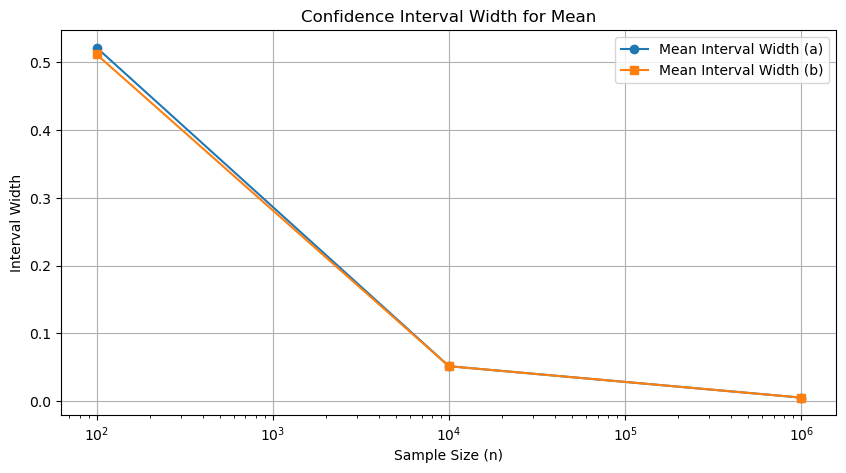

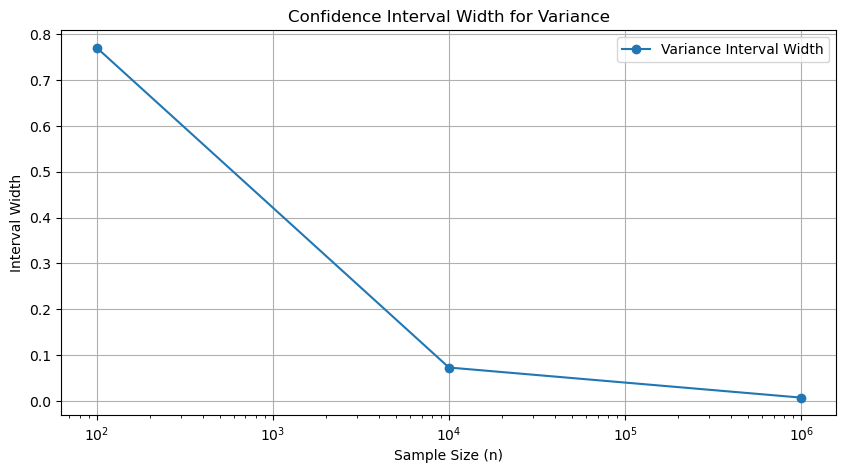

   Sample Size  Coverage Mean (a)  Coverage Mean (b)  Coverage Variance
0          100               0.99               0.99               0.98
1        10000               0.97               0.97               1.00
2      1000000               0.99               0.99               1.00


In [7]:
import matplotlib.pyplot as plt

# Графік ширини довірчих інтервалів для математичного сподівання (a) та (b)
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, df_results.groupby("n")["Mean Interval Width (a)"].mean(), marker='o', label="Mean Interval Width (a)")
plt.plot(sample_sizes, df_results.groupby("n")["Mean Interval Width (b)"].mean(), marker='s', label="Mean Interval Width (b)")
plt.xscale("log")
plt.xlabel("Sample Size (n)")
plt.ylabel("Interval Width")
plt.title("Confidence Interval Width for Mean")
plt.legend()
plt.grid(True)
plt.show()

# Графік ширини довірчого інтервалу для дисперсії
plt.figure(figsize=(10, 5))
plt.plot(sample_sizes, df_results.groupby("n")["Variance Interval Width"].mean(), marker='o', label="Variance Interval Width")
plt.xscale("log")
plt.xlabel("Sample Size (n)")
plt.ylabel("Interval Width")
plt.title("Confidence Interval Width for Variance")
plt.legend()
plt.grid(True)
plt.show()

# Аналіз покриття теоретичних значень
mean_coverage_a = df_results.groupby("n")["Mean in Interval (a)"].mean()
mean_coverage_b = df_results.groupby("n")["Mean in Interval (b)"].mean()
variance_coverage = df_results.groupby("n")["Variance in Interval"].mean()

# Відображення таблиці з покриттям
coverage_results = pd.DataFrame({
    "Sample Size": sample_sizes,
    "Coverage Mean (a)": mean_coverage_a.values,
    "Coverage Mean (b)": mean_coverage_b.values,
    "Coverage Variance": variance_coverage.values
})
print(coverage_results)

### Відповіді на питання:

1. **Чи потрапляють математичне сподівання та дисперсія у побудовані довірчі інтервали?**  
   - Як показують результати в таблиці покриття, ймовірність потрапляння математичного сподівання в інтервал (для обох підходів) близька до 99%, що відповідає заданій довірчій ймовірності.
   - Для дисперсії покриття трохи варіюється: при $n = 100 $ воно трохи нижче (97%), але для більших вибірок наближається до 100%.

2. **Як змінюється довжина довірчого інтервалу при збільшенні $n $?**  
   - Графіки показують, що ширина довірчих інтервалів зменшується зі збільшенням розміру вибірки. Це відповідає теоретичному очікуванню: чим більше даних, тим точніше оцінки і тим вужчі інтервали.
   - Зменшення відбувається приблизно пропорційно до $\frac{1}{\sqrt{n}} $, що узгоджується з теоретичними формулами.